##READ IN FROM DATA
file_path = r'C:\Users\johnc\Desktop\DA12\Python\DA12capstone_Videogame_Monetization\data\your_file_name.csv'
df = pd.read_csv(file_path)

In [1]:
import requests
from bs4 import BeautifulSoup as BS
import pandas as pd
import html5lib
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
file_path = r'C:\Users\johnc\Desktop\DA12\Python\DA12capstone_Videogame_Monetization\data\player_count_mobile_games_raw.csv'
mobile_games_player_count = pd.read_csv(file_path)

In [3]:
mobile_games_player_count.head(1)

,Game,As of,Player count[a],Release date,Publisher(s),Ref.
0,Candy Crush Saga,"March 24, 2023",500 million,"April 12, 2012",King,[1]


the_tencent_list = {'Netmarble Japan':'Tencent Games','Supercell':'Tencent Games','SYBO Games':'Tencent Games','TiMi Studios / Tencent Games / Garena':'Tencent Games','Tencent games':'Tencent Games','MZ:Tencent Games'}

In [4]:
mobile_games_player_count_changed = mobile_games_player_count

In [5]:
mobile_games_player_count_changed.columns=['Game','Date_of_Count', 'Player_Count', 'Release_Date', 'Publishers','drop']

In [6]:
mobile_games_player_count_changed=mobile_games_player_count_changed.drop(columns='drop')

mobile_games_player_count_changed['Publishers']=mobile_games_player_count_changed['Publishers'].replace(the_tencent_list)

In [7]:
mobile_games_player_count_changed.Publishers.value_counts()

Publishers
Playrix                                  4
Tencent Games                            3
Rovio Entertainment                      2
Bandai Namco Entertainment               2
Line Corporation                         2
Nintendo                                 2
Electronic Arts                          2
Konami                                   2
Disney Interactive                       1
Blizzard Entertainment                   1
thatgamecompany                          1
Elex                                     1
PONOS                                    1
GungHo Online Entertainment              1
King                                     1
HoYoverse                                1
Netmarble Japan                          1
Aniplex / Type-Moon                      1
KLab                                     1
Game Insight                             1
MZ                                       1
Supercell                                1
Colopl                                   1


In [8]:
mobile_games_player_count_changed.at[1,'Player_Count'] = '500 million'

In [9]:
mobile_games_player_count_changed.at[2,'Player_Count'] = '485 million'

In [10]:
mobile_games_player_count_changed.at[9,'Player_Count'] = '310 million'

In [11]:
mobile_games_player_count_changed.at[14,'Player_Count'] = '210 million'

In [12]:
mobile_games_player_count_changed.at[21,'Player_Count'] = '124 million'

In [13]:
mobile_games_player_count_changed.at[24,'Player_Count'] = '112 million'

In [14]:
mobile_games_player_count_changed.at[25,'Player_Count'] = '108 million'

In [15]:
mobile_games_player_count_changed.at[48,'Player_Count'] = '53 million'

In [16]:
mobile_games_player_count_changed.at[49,'Player_Count'] = '52 million'

In [17]:
mobile_games_player_count_changed.at[17,'Release_Date'] = 'April 16, 2018'

In [18]:
mobile_games_player_count_changed.at[7,'Release_Date'] = 'August 1, 2016'

In [19]:
mobile_games_player_count_changed.at[8,'Release_Date'] = 'August 1, 2017'

In [20]:
mobile_games_player_count_changed.at[9,'Release_Date'] = 'March 1, 2018'

In [21]:
mobile_games_player_count_changed.at[12,'Release_Date'] = 'November 1, 2017'

mobile_games_player_count_changed.at[13,'Release_Date'] = 'March 1, 2018'

In [22]:
mobile_games_player_count_changed.at[25,'Release_Date'] = 'December 1, 2017'

In [23]:
mobile_games_player_count_changed.at[26,'Release_Date'] = 'April 1, 2011'

In [24]:
mobile_games_player_count_changed.at[27,'Release_Date'] = 'March 1, 2015'

In [25]:
def extract(count):
    return int(count.split()[0])*1_000_000

In [26]:
mobile_games_player_count_changed['Player_Count_Int']=mobile_games_player_count_changed['Player_Count'].apply(extract)

In [27]:
mobile_games_player_count_changed['Release_Date_Datetime'] = pd.to_datetime(mobile_games_player_count_changed['Release_Date'])

In [28]:
mobile_games_player_count_changed.head(1)

,Game,Date_of_Count,Player_Count,Release_Date,Publishers,Player_Count_Int,Release_Date_Datetime
0,Candy Crush Saga,"March 24, 2023",500 million,"April 12, 2012",King,500000000,2012-04-12


In [29]:
mobile_games_player_count_changed['Publishers_Unmasked']=mobile_games_player_count_changed['Publishers']

In [30]:
the_microsoft_list = {'King':'Microsoft', 'Blizzard Entertainment':'Microsoft', 'Activison':'Microsoft','Activision':'Microsoft'}

In [31]:
nintendo_list = {'Bandai Namco Entertainment':'Nintendo','Sega':'Nintendo','Rovio Entertainment':'Nintendo','Konami':'Nintendo',}

In [32]:
the_tencent_list = {
    'Netmarble Japan': 'Tencent',
    'Supercell': 'Tencent',
    'SYBO Games': 'Tencent',
    'TiMi Studios / Tencent Games / Garena': 'Tencent',
    'Tencent games': 'Tencent',
    'MZ': 'Tencent Games',
    'GungHo Online Entertainment':'Tencent',
    'Electronic Arts':'Tencent',
    'Wargaming':'Tencent',
    'NetEase':'Tencent',
    'EA Sports':'Tencent',
    'Electronic Arts':'Tencent',
    'Tencent Games':'Tencent'
}

In [33]:
Unmasked_Dictionary = {**the_microsoft_list,**nintendo_list,**the_tencent_list}

In [34]:
mobile_games_player_count_changed['Publishers_Unmasked']=mobile_games_player_count_changed['Publishers_Unmasked'].replace(Unmasked_Dictionary)

In [35]:
mobile_games_player_count_changed

,Game,Date_of_Count,Player_Count,Release_Date,Publishers,Player_Count_Int,Release_Date_Datetime,Publishers_Unmasked
0,Candy Crush Saga,"March 24, 2023",500 million,"April 12, 2012",King,500000000,2012-04-12,Microsoft
1,Call of Duty: Mobile,May 2021,500 million,"October 1, 2019",Activision,500000000,2019-10-01,Microsoft
2,Among Us,November 2020,485 million,"June 15, 2018",InnerSloth,485000000,2018-06-15,InnerSloth
3,Mini World,April 2020,400 million,"December 26, 2015",Minovate,400000000,2015-12-26,Minovate
4,Dragon Ball Z: Dokkan Battle,August 2021,350 million,"January 30, 2015",Bandai Namco Entertainment,350000000,2015-01-30,Nintendo
5,Sonic Dash,February 2020,350 million,"March 7, 2013",Sega,350000000,2013-03-07,Nintendo
6,Helix Jump,December 2018,334 million,"February 10, 2018",Voodoo,334000000,2018-02-10,Voodoo
7,Gardenscapes: New Acres,May 2020,324 million,"August 1, 2016",Playrix,324000000,2016-08-01,Playrix
8,Homescapes,May 2020,312 million,"August 1, 2017",Playrix,312000000,2017-08-01,Playrix
9,PUBG Mobile,August 2023,310 million,"March 1, 2018",Tencent games,310000000,2018-03-01,Tencent


In [36]:
mobile_games_player_count_changed.Publishers_Unmasked.value_counts()

Publishers_Unmasked
Tencent                          14
Nintendo                          9
Playrix                           4
Microsoft                         3
Line Corporation                  2
thatgamecompany                   1
Tencent Games                     1
Game Insight                      1
KLab                              1
Aniplex / Type-Moon               1
HoYoverse                         1
Disney Interactive                1
PONOS                             1
Elex                              1
Gametion Technologies Pvt Ltd     1
Colopl                            1
InnerSloth                        1
Youzu Interactive                 1
Creative Mobile                   1
Gameloft                          1
Pixonic                           1
Serkan Özyılmaz                   1
Voodoo                            1
Minovate                          1
dotGears                          1
Name: count, dtype: int64

In [37]:
mobile_games_player_count_changed_again = mobile_games_player_count_changed

In [38]:
mobile_games_player_count_changed_again=mobile_games_player_count_changed_again[mobile_games_player_count_changed_again['Publishers_Unmasked'].isin(['Tencent','Nintendo','Playrix','Microsoft','HoYoverse','InnerSloth','Voodoo'])]

In [39]:
mobile_games_player_count_changed_again.head(2)

,Game,Date_of_Count,Player_Count,Release_Date,Publishers,Player_Count_Int,Release_Date_Datetime,Publishers_Unmasked
0,Candy Crush Saga,"March 24, 2023",500 million,"April 12, 2012",King,500000000,2012-04-12,Microsoft
1,Call of Duty: Mobile,May 2021,500 million,"October 1, 2019",Activision,500000000,2019-10-01,Microsoft


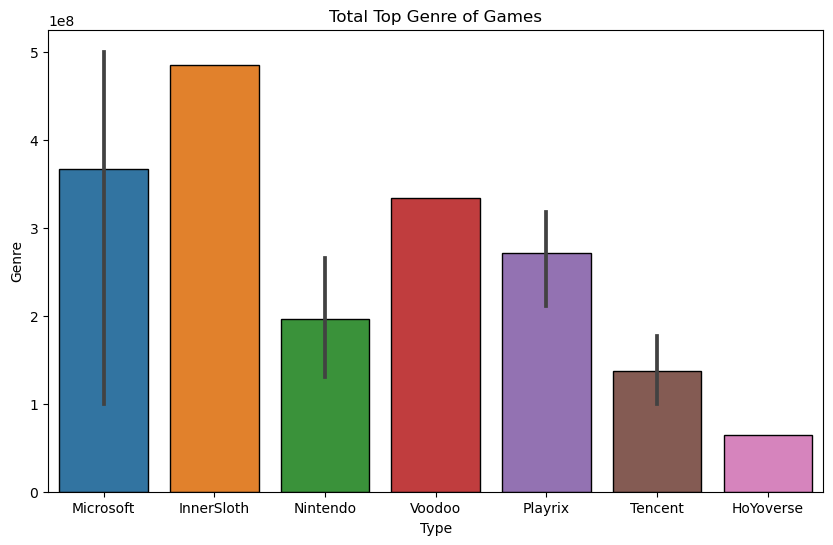

In [40]:
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(data=mobile_games_player_count_changed_again, x='Publishers_Unmasked', y='Player_Count_Int', edgecolor='black', linewidth=1)

plt.title('Total Top Genre of Games')
plt.xlabel('Type')
plt.ylabel('Genre')
plt.show()

In [41]:
gr = mobile_games_player_count_changed_again

In [42]:
greatnewgraph=gr.groupby('Publishers_Unmasked')['Player_Count_Int'].sum().reset_index()
greatnewgraph

,Publishers_Unmasked,Player_Count_Int
0,HoYoverse,65000000
1,InnerSloth,485000000
2,Microsoft,1100000000
3,Nintendo,1764000000
4,Playrix,1083000000
5,Tencent,1915000000
6,Voodoo,334000000


In [74]:
greatnewgraph['Player_Count_Int_Formatted'] = greatnewgraph['Player_Count_Int'].apply(lambda x: f"{x:,}")

In [76]:
def format_in_millions(number):
    return f"{number / 1_000_000:.0f} million"

In [77]:
greatnewgraph['Player_Count_Int_Millions'] = greatnewgraph['Player_Count_Int'].apply(format_in_millions)

In [78]:
greatnewgraph

,Publishers_Unmasked,Player_Count_Int,Player_Count_Int_Formatted,Player_Count_Int_Millions
0,HoYoverse,65000000,"65,000,000",65 million
1,InnerSloth,485000000,"485,000,000",485 million
2,Microsoft,1100000000,"1,100,000,000",1100 million
3,Nintendo,1764000000,"1,764,000,000",1764 million
4,Playrix,1083000000,"1,083,000,000",1083 million
5,Tencent,1915000000,"1,915,000,000",1915 million
6,Voodoo,334000000,"334,000,000",334 million


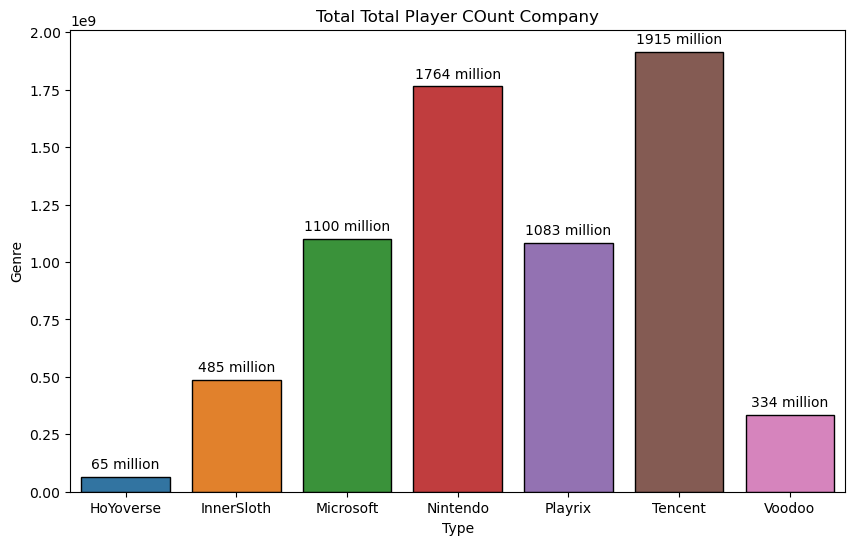

In [100]:
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(data=greatnewgraph, x='Publishers_Unmasked', y='Player_Count_Int', edgecolor='black', linewidth=1)

# Add annotations with 'Game' column
for p, label in zip(bar_plot.patches, greatnewgraph['Player_Count_Int_Millions']):
    bar_plot.annotate(label, 
                      (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha = 'center', va = 'center', 
                      xytext = (0, 9), 
                      textcoords = 'offset points')

plt.title('Total Total Player COunt Company')
plt.xlabel('Type')
plt.ylabel('Genre')
plt.savefig(r'C:\Users\johnc\Desktop\DA12\Python\DA12capstone_Videogame_Monetization\data\TotalPlayerCountGameCompanymobile.png', bbox_inches='tight')
plt.show()

In [44]:
original = mobile_games_player_count_changed_again

In [45]:
resetindex = original.groupby('Publishers_Unmasked')['Player_Count_Int'].max().reset_index()

In [46]:
originalreset = pd.merge(original, resetindex, on=['Publishers_Unmasked', 'Player_Count_Int'])

In [51]:
originalreset=originalreset.drop(index=[1,4])

KeyError: '[1, 4] not found in axis'

In [52]:
originalreset

,Game,Date_of_Count,Player_Count,Release_Date,Publishers,Player_Count_Int,Release_Date_Datetime,Publishers_Unmasked
0,Candy Crush Saga,"March 24, 2023",500 million,"April 12, 2012",King,500000000,2012-04-12,Microsoft
2,Among Us,November 2020,485 million,"June 15, 2018",InnerSloth,485000000,2018-06-15,InnerSloth
3,Dragon Ball Z: Dokkan Battle,August 2021,350 million,"January 30, 2015",Bandai Namco Entertainment,350000000,2015-01-30,Nintendo
5,Helix Jump,December 2018,334 million,"February 10, 2018",Voodoo,334000000,2018-02-10,Voodoo
6,Gardenscapes: New Acres,May 2020,324 million,"August 1, 2016",Playrix,324000000,2016-08-01,Playrix
7,PUBG Mobile,August 2023,310 million,"March 1, 2018",Tencent games,310000000,2018-03-01,Tencent
8,Genshin Impact,February 2023,65 million,"September 28, 2020",HoYoverse,65000000,2020-09-28,HoYoverse


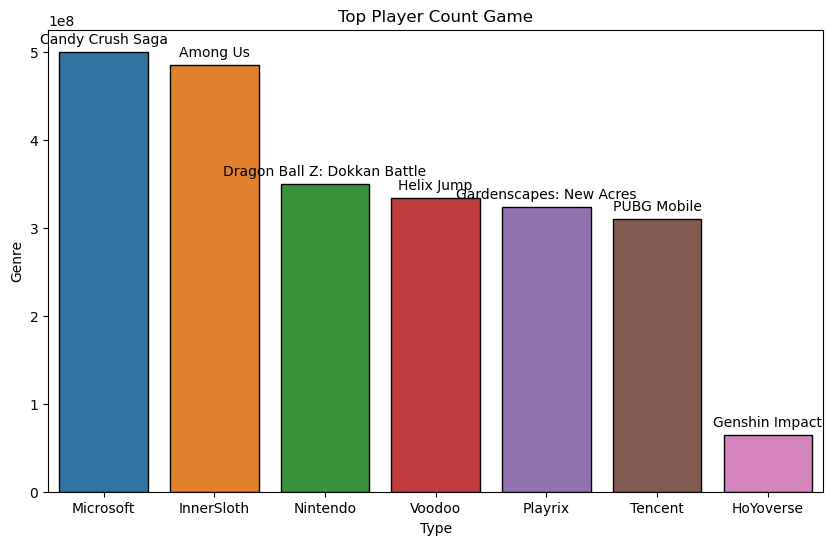

In [101]:
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(data=originalreset, x='Publishers_Unmasked', y='Player_Count_Int', edgecolor='black', linewidth=1)

# Add annotations with 'Game' column
for p, label in zip(bar_plot.patches, originalreset['Game']):
    bar_plot.annotate(label, 
                      (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha = 'center', va = 'center', 
                      xytext = (0, 9), 
                      textcoords = 'offset points')

plt.title('Top Player Count Game')
plt.xlabel('Type')
plt.ylabel('Genre')
plt.savefig(r'C:\Users\johnc\Desktop\DA12\Python\DA12capstone_Videogame_Monetization\data\TopPlayerCountGameCompanymemobile.png', bbox_inches='tight')
plt.show()

In [80]:
mobile_games_player_count_changed_again

,Game,Date_of_Count,Player_Count,Release_Date,Publishers,Player_Count_Int,Release_Date_Datetime,Publishers_Unmasked
0,Candy Crush Saga,"March 24, 2023",500 million,"April 12, 2012",King,500000000,2012-04-12,Microsoft
1,Call of Duty: Mobile,May 2021,500 million,"October 1, 2019",Activision,500000000,2019-10-01,Microsoft
2,Among Us,November 2020,485 million,"June 15, 2018",InnerSloth,485000000,2018-06-15,InnerSloth
4,Dragon Ball Z: Dokkan Battle,August 2021,350 million,"January 30, 2015",Bandai Namco Entertainment,350000000,2015-01-30,Nintendo
5,Sonic Dash,February 2020,350 million,"March 7, 2013",Sega,350000000,2013-03-07,Nintendo
6,Helix Jump,December 2018,334 million,"February 10, 2018",Voodoo,334000000,2018-02-10,Voodoo
7,Gardenscapes: New Acres,May 2020,324 million,"August 1, 2016",Playrix,324000000,2016-08-01,Playrix
8,Homescapes,May 2020,312 million,"August 1, 2017",Playrix,312000000,2017-08-01,Playrix
9,PUBG Mobile,August 2023,310 million,"March 1, 2018",Tencent games,310000000,2018-03-01,Tencent
10,Super Mario Run,August 2018,300 million,"December 15, 2016",Nintendo,300000000,2016-12-15,Nintendo


In [83]:
mobile_games_player_count_changed_again.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33 entries, 0 to 49
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Game                       33 non-null     object        
 1   Date_of_Count              33 non-null     object        
 2   Player_Count               33 non-null     object        
 3   Release_Date               33 non-null     object        
 4   Publishers                 33 non-null     object        
 5   Player_Count_Int           33 non-null     int64         
 6   Release_Date_Datetime      33 non-null     datetime64[ns]
 7   Publishers_Unmasked        33 non-null     object        
 8   Player_Count_Int_Millions  33 non-null     object        
dtypes: datetime64[ns](1), int64(1), object(7)
memory usage: 2.6+ KB


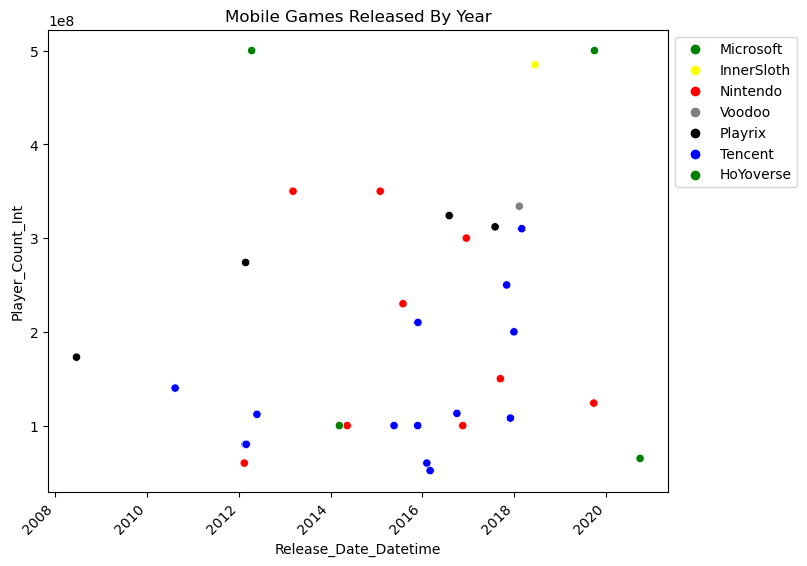

In [102]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=mobile_games_player_count_changed_again,
                x='Release_Date_Datetime',
                y='Player_Count_Int',
                hue='Publishers_Unmasked',
                palette=['green','yellow','red','grey','black','blue','green'])

plt.xticks(rotation=45, ha='right')
plt.title('Mobile Games Released By Year')

plt.legend(bbox_to_anchor=(1.0, 1), loc='upper left')

plt.savefig(r'C:\Users\johnc\Desktop\DA12\Python\DA12capstone_Videogame_Monetization\data\somethingelsetrythis.png', bbox_inches='tight')
plt.show()
